<a href="https://colab.research.google.com/github/Pranavla/Stress_Detection-/blob/main/Stress_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INTRODUCTION**

Stress, anxiety and depression are thretening the mental health of people. Every person has a reason for having a stressfull life.

# **Importing necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nltk
import re

# **Importing the dataset**

In [ ]:
df=pd.read_csv("/content/stress.csv")
print(df.head())

          subreddit post_id sentence_range  \
0              ptsd  8601tu       (15, 20)   
1        assistance  8lbrx9         (0, 5)   
2              ptsd  9ch1zh       (15, 20)   
3     relationships  7rorpp        [5, 10]   
4  survivorsofabuse  9p2gbc         [0, 5]   

                                                text     id  label  \
0  He said he had not felt that way before, sugge...  33181      1   
1  Hey there r/assistance, Not sure if this is th...   2606      0   
2  My mom then hit me with the newspaper and it s...  38816      1   
3  until i met my new boyfriend, he is amazing, h...    239      1   
4  October is Domestic Violence Awareness Month a...   1421      1   

   confidence  social_timestamp  social_karma  syntax_ari  ...  \
0         0.8        1521614353             5    1.806818  ...   
1         1.0        1527009817             4    9.429737  ...   
2         0.8        1535935605             2    7.769821  ...   
3         0.6        1516429555       

As we can see the dataset is having 5 rows and 116 columns

Checking null values

In [ ]:
df.isnull().sum()

subreddit                   0
post_id                     0
sentence_range              0
text                        0
id                          0
                           ..
lex_dal_avg_pleasantness    1
social_upvote_ratio         1
social_num_comments         1
syntax_fk_grade             1
sentiment                   1
Length: 116, dtype: int64

Importing libraries used for process and analyse text data

In [ ]:
nltk.download('stopwords')
stemmer=nltk.SnowballStemmer('english')
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Cleaning the text columns with imported libraries

In [ ]:
def clean(text):
  text=str(text).lower()
  text=re.sub('\[.*?\]','',text)
  text=re.sub('https?://\S+|www\.\S+','',text)
  text=re.sub('<.*?>+','',text)
  text=re.sub('[%s]'% re.escape(string.punctuation),'',text)
  text=re.sub('\n','',text)
  text=re.sub('\w*\d\w*','',text)
  text=[word for word in text.split(' ')if word not in stopword]
  text=" ".join(text)
  text=[stemmer.stem(word) for word in text.split(' ')]
  text=" ".join(text)
  return text
df["text"]=df['text'].apply(clean)


Most used words by people to express their stress in social media

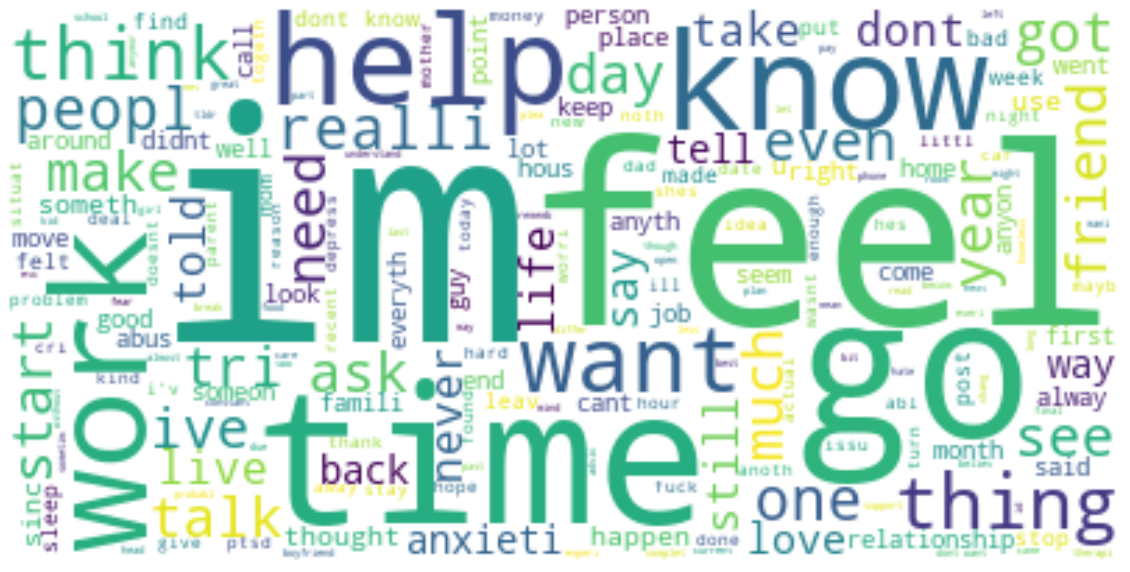

In [ ]:
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
text=' '.join(i for i in df.text)
stopwords=set(STOPWORDS)
wordcloud=WordCloud(stopwords=stopwords,background_color='white').generate(text)
plt.figure(figsize=(20,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# **Creating the Model for Detection**

In [ ]:
df['label']=df['label'].map({0: "No Stress",1:"Have Stress"})
df=df[['text','label']]
df

,text,label
0,said felt way sugget go rest trigger ahead you...,Have Stress
1,hey rassist sure right place post goe im curr...,No Stress
2,mom hit newspap shock would know dont like pla...,Have Stress
3,met new boyfriend amaz kind sweet good student...,Have Stress
4,octob domest violenc awar month domest violenc...,Have Stress
...,...,...
2180,email live hometown inperson meet possibl thin...,No Stress
2181,could write long book issu current issu strang...,No Stress
2182,rub shoulder peopl social frequent may also so...,No Stress
2183,don't live home anymor take care howev father ...,No Stress


# **Seperate X(input) and y(Output)**

In [ ]:
X=np.array(df['text'])
y=np.array(df['label'])
y

array(['Have Stress', 'No Stress', 'Have Stress', ..., 'No Stress',
       'No Stress', 'Have Stress'], dtype=object)

In [ ]:
X

array(['said felt way sugget go rest trigger ahead youir hypocondriac like decid look feel doom hope mayb get suck rabbit hole ludicr conspiraci stupid psychic test new age bs someth could even laugh road end read sens doom indic various health ailment one prone top doom gloomi fn worri heart happen physic  hour',
       'hey rassist sure right place post goe  im current student intern sandia nation lab work survey help improv market outreach effort mani school recruit around countri look current undergradgrad stem student your stem student know stem student would great appreci help take pass along short survey thank everyon help take survey enter draw chanc win one three  amazon gcs',
       'mom hit newspap shock would know dont like play hit smack strike hit violenc sort person send vibe ask univers yesterday decid take friend go help anoth friend move new place drive friend move strike shoulder address immedi  time told thing friend drive near get collis anoth car think high mariju

# **Seperate into training and testing data**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X=cv.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [ ]:
from sklearn.naive_bayes import BernoulliNB
NB=BernoulliNB()
NB.fit(X_train,y_train)
y_pred=NB.predict(X_test)

# **Prediction**

              precision    recall  f1-score   support

 Have Stress       0.69      0.83      0.75       339
   No Stress       0.77      0.60      0.67       317

    accuracy                           0.72       656
   macro avg       0.73      0.72      0.71       656
weighted avg       0.73      0.72      0.72       656



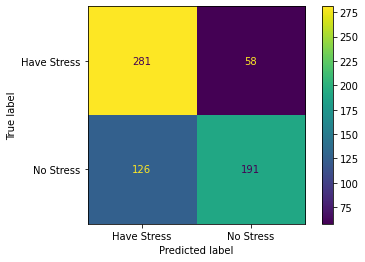

In [ ]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

# **Implementation**

In [ ]:
user=input("Enter a Text: ")
data=cv.transform([user]).toarray()
output=NB.predict(data)
print(output)

Enter a Text: People need to takecare of their mental health
['No Stress']


In [ ]:
user=input("Enter a Text: ")
data=cv.transform([user]).toarray()
output=NB.predict(data)
print(output)

Enter a Text: Sometimes i feel like i need some help
['Have Stress']


# **Summary**

I have created a machine learning model to detect stress from social media posts. People often share their feelings on social media posts. Many organizations can use stress detection to find which social media users are stressed to help them quickly.